# Reading Images in openCV

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('./image/0.jpg')

In [3]:
cv2.imshow('cat', img)
cv2.waitKey(3000)
cv2.destroyAllWindows()

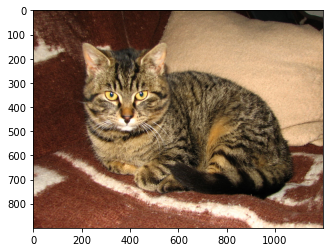

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [5]:
def rescale(frame, scale=0.7):
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    dim = (width, height)
    
    return cv2.resize(frame, dim, interpolation=cv2.INTER_AREA)
    

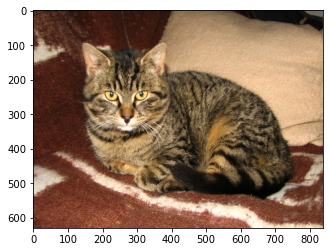

In [6]:
plt.imshow(cv2.cvtColor(rescale(img), cv2.COLOR_BGR2RGB))

In [10]:
vid = cv2.VideoCapture('./video/0.mp4')

while True:
    
    isTrue, frame = vid.read()
    
    if isTrue:
        frame_resize = rescale(frame)
        cv2.imshow('Video', frame_resize)
        if cv2.waitKey(20) & 0xFF==ord('d'):
            break
    else:
        break
vid.release()
cv2.destroyAllWindows()

In [11]:
cv2.GaussianBlur?

In [10]:
for i in range(1, 11):
    k = i*0.1
    cv2.imshow(f'Blur{i}', cv2.GaussianBlur(img, (7, 7), k))
    cv2.waitKey(1000)
cv2.destroyAllWindows()

In [15]:
cv2.destroyAllWindows()

# Canny Edge detection

In [46]:
temp = cv2.GaussianBlur(img, (5,5), cv2.BORDER_DEFAULT)
temp = cv2.Canny(temp, 30, 150)
cv2.imshow('Video', temp)
cv2.waitKey(0)

-1

In [45]:
cv2.imshow('dilated', cv2.dilate(temp, (3,3), iterations=5))
cv2.waitKey(0)

-1

In [47]:
cv2.destroyAllWindows()

# Contour Detection

In [48]:
cv2.imshow('cat', img)
cv2.waitKey(0)

-1

In [7]:
temp = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
temp = cv2.GaussianBlur(temp, (5,5), cv2.BORDER_DEFAULT)
temp = cv2.Canny(temp, 125, 175)

cv2.imshow('Canny', temp)
cv2.waitKey(3000)
cv2.destroyAllWindows()

contours, hierarchies = cv2.findContours(temp, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(contours, hierarchies)

[array([[[305, 892]],

       [[305, 893]],

       [[304, 894]],

       [[303, 895]],

       [[302, 896]],

       [[303, 896]],

       [[304, 895]],

       [[305, 894]],

       [[305, 893]]], dtype=int32), array([[[1173,  885]],

       [[1173,  886]],

       [[1174,  886]],

       [[1175,  886]],

       [[1176,  886]],

       [[1177,  886]],

       [[1178,  887]],

       [[1179,  886]],

       [[1180,  886]],

       [[1181,  886]],

       [[1182,  887]],

       [[1183,  887]],

       [[1184,  887]],

       [[1185,  886]],

       [[1186,  887]],

       [[1187,  888]],

       [[1188,  888]],

       [[1189,  889]],

       [[1190,  889]],

       [[1191,  889]],

       [[1192,  889]],

       [[1193,  889]],

       [[1194,  889]],

       [[1195,  889]],

       [[1196,  889]],

       [[1197,  889]],

       [[1198,  890]],

       [[1199,  890]],

       [[1198,  890]],

       [[1197,  889]],

       [[1196,  889]],

       [[1195,  889]],

       [[1194,  889

In [11]:
cv2.imshow('img', img)
cv2.waitKey(3000)
cv2.destroyAllWindows()

In [12]:
img.shape

(900, 1200, 3)

In [26]:
b,g,r = cv2.split(img)

temp = np.zeros(img.shape)
temp[:,:,0] = b*0.1

cv2.imshow('img', temp)
cv2.waitKey(0)

temp = np.zeros(img.shape)
temp[:,:,1] = g

cv2.imshow('img', temp)
cv2.waitKey(3000)

temp = np.zeros(img.shape)
temp[:,:,2] = r

cv2.imshow('img', temp)
cv2.waitKey(3000)

cv2.destroyAllWindows()

In [27]:
temp = np.zeros(img.shape)
temp[:,:,0] = b
print(temp)

[[[ 15.   0.   0.]
  [ 17.   0.   0.]
  [ 21.   0.   0.]
  ...
  [ 84.   0.   0.]
  [ 84.   0.   0.]
  [ 86.   0.   0.]]

 [[ 20.   0.   0.]
  [ 22.   0.   0.]
  [ 25.   0.   0.]
  ...
  [ 84.   0.   0.]
  [ 84.   0.   0.]
  [ 85.   0.   0.]]

 [[ 21.   0.   0.]
  [ 24.   0.   0.]
  [ 29.   0.   0.]
  ...
  [ 85.   0.   0.]
  [ 84.   0.   0.]
  [ 85.   0.   0.]]

 ...

 [[ 28.   0.   0.]
  [ 27.   0.   0.]
  [ 31.   0.   0.]
  ...
  [157.   0.   0.]
  [158.   0.   0.]
  [160.   0.   0.]]

 [[ 25.   0.   0.]
  [ 27.   0.   0.]
  [ 31.   0.   0.]
  ...
  [154.   0.   0.]
  [159.   0.   0.]
  [163.   0.   0.]]

 [[ 22.   0.   0.]
  [ 25.   0.   0.]
  [ 29.   0.   0.]
  ...
  [152.   0.   0.]
  [159.   0.   0.]
  [164.   0.   0.]]]


In [28]:
b,g,r = cv2.split(img)
cv2.imshow('img', b)
cv2.waitKey(3000)
cv2.imshow('img', g)
cv2.waitKey(3000)
cv2.imshow('img', r)
cv2.waitKey(3000)
cv2.destroyAllWindows()

# Histograms

In [39]:
%matplotlib qt
gray_hist = cv2.calcHist([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)], [0], None, [256], [0,256])
plt.figure(figsize=(7,7))
plt.plot(gray_hist)
plt.show()
cv2.imshow('img', cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [46]:
cv2.calcHist?

In [51]:
plt.figure(figsize=(7,7))
for i in enumerate(('b', 'g', 'r')):
    gray_hist = cv2.calcHist([img], [i[0]], None, [256], [0,256])
    plt.plot(gray_hist, color=i[1])
plt.show()

# Edge Detection

In [17]:
import cv2 as cv2
import matplotlib.pyplot as plt
import numpy as np

In [34]:
img = cv2.imread('./image/0.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

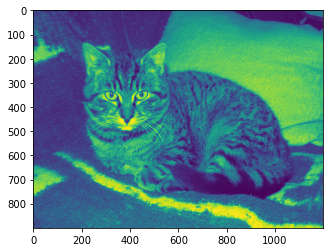

In [10]:
plt.imshow(img)

In [15]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
closing = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

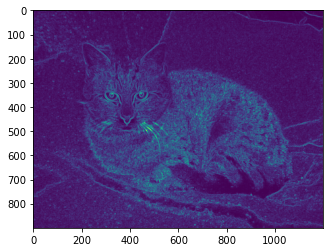

In [16]:
plt.imshow(closing)

In [18]:
img = np.ones((5,5), dtype=np.uint8) * 120

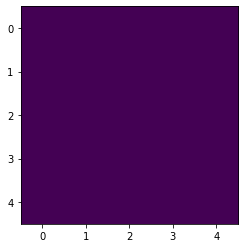

In [19]:
plt.imshow(img)

In [20]:
plt.imsave('img.jpg', img)

In [21]:
kernel = [[0,0,0], [0,0,1], [0,0,0]]

In [22]:
kernel = np.array(kernel, dtype=np.uint8)

In [23]:
kernel

array([[0, 0, 0],
       [0, 0, 1],
       [0, 0, 0]], dtype=uint8)

In [24]:
identity = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

In [26]:
print(identity, kernel)

[[120 120 120 120 120]
 [120 120 120 120 120]
 [120 120 120 120 120]
 [120 120 120 120 120]
 [120 120 120 120 120]] [[0 0 0]
 [0 0 1]
 [0 0 0]]


In [30]:
X = [ [1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 1], [1, 1, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1]]
X = np.array(X, dtype=np.uint8)

In [31]:
eroded = cv2.erode(X, None, iterations= 1)

In [32]:
eroded

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]], dtype=uint8)

In [33]:
100*100*8

80000

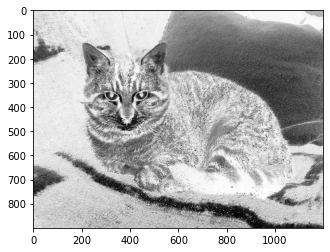

In [42]:
blur = cv2.blur(img, (5,5))
temp = img - blur
plt.imshow(img+temp, cmap='Greys')

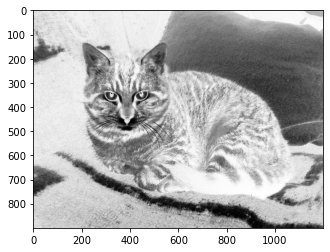

In [41]:
plt.imshow(img, cmap='Greys')

In [43]:
X = [ [5 , 6 , 7 ,8], [0, 6, 7, 8], [5, 6, 15, 8], [5, 6, 7, 8] ]
X = np.array(X, dtype=np.uint8)

In [45]:
cv2.medianBlur(X, 3)

array([[5, 6, 7, 8],
       [5, 6, 7, 8],
       [5, 6, 7, 8],
       [5, 6, 7, 8]], dtype=uint8)

In [46]:
X = X = [ [1, 1, 1, 1, 1, 1], [1, 1, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1]]
X = np.array(X, dtype=np.uint8)

In [49]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
closing = cv2.morphologyEx(X, cv2.MORPH_DILATE, kernel)

In [50]:
closing

array([[1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1]], dtype=uint8)